In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Dense
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('./titanic_dataset.csv')
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Fare','Embarked'], axis=1, inplace=True)
data.dropna(inplace=True)
# convert age to closest int

data['Age'] = (data['Age']).astype(int)
#normalize age
data['Age'] = (data['Age']-data['Age'].min())/(data['Age'].max()-data['Age'].min())
#normalize sibsp
data['SibSp'] = (data['SibSp']-data['SibSp'].min())/(data['SibSp'].max()-data['SibSp'].min())
#normalize parch
data['Parch'] = (data['Parch']-data['Parch'].min())/(data['Parch'].max()-data['Parch'].min())
#normalize pclass
data['Pclass'] = (data['Pclass']-data['Pclass'].min())/(data['Pclass'].max()-data['Pclass'].min())



# change sex to 0 or 1
# add new column of 0s
data = data.assign(SexNum=0)

for row, col in data.iterrows():
    if(data.at[row,'Sex']=='male'):
        data.at[row,'SexNum']=1

#drop sex column
data.drop(['Sex'], axis=1, inplace=True) 
data.describe()





,Survived,Pclass,Age,SibSp,Parch,SexNum
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,0.618347,0.370991,0.102521,0.071895,0.634454
std,0.491460,0.419125,0.181706,0.185957,0.142215,0.481921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,0.350000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.475000,0.200000,0.166667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# data.drop(['Parch'], axis=1, inplace=True)
# data.drop(['SibSp'], axis=1, inplace=True)
# data.head(5)

#### On remarque que l'accuracy change très peu en retirant ces 2 colonnes

In [4]:
X = data.drop('Survived', axis=1)
Y = np.array(data['Survived']) 


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,SexNum
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,0.618347,0.370991,0.102521,0.071895,0.634454
std,0.491460,0.419125,0.181706,0.185957,0.142215,0.481921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,0.350000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.475000,0.200000,0.166667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

model = RandomForestClassifier(n_estimators=1500, max_depth=5, random_state=1)

history = model.fit(X_train, Y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, Y_test)))



Accuracy on training set: 0.844
Accuracy on test set: 0.846


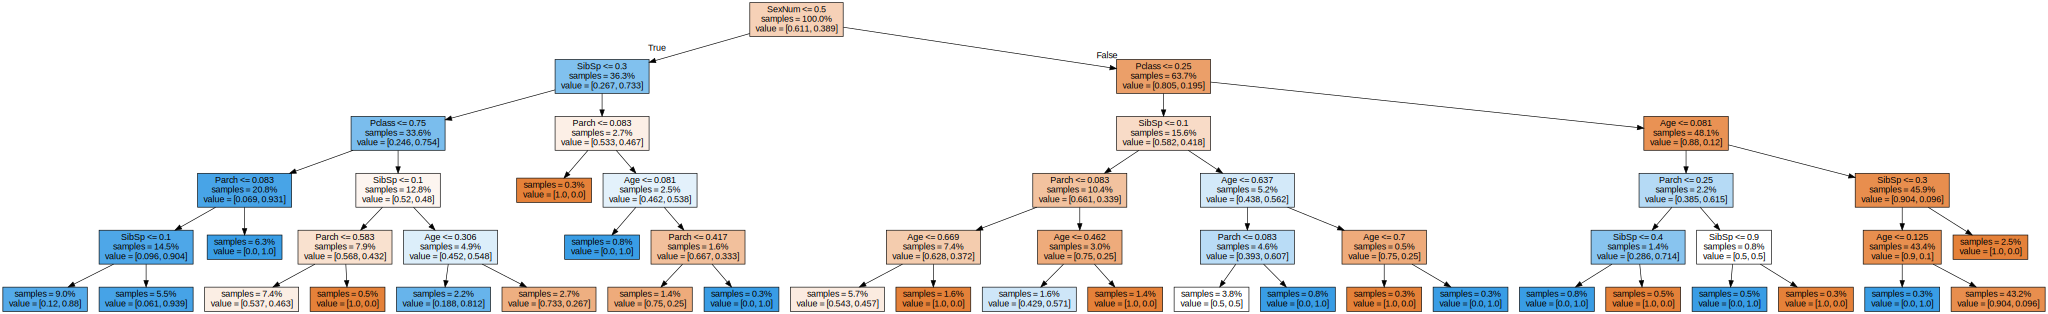

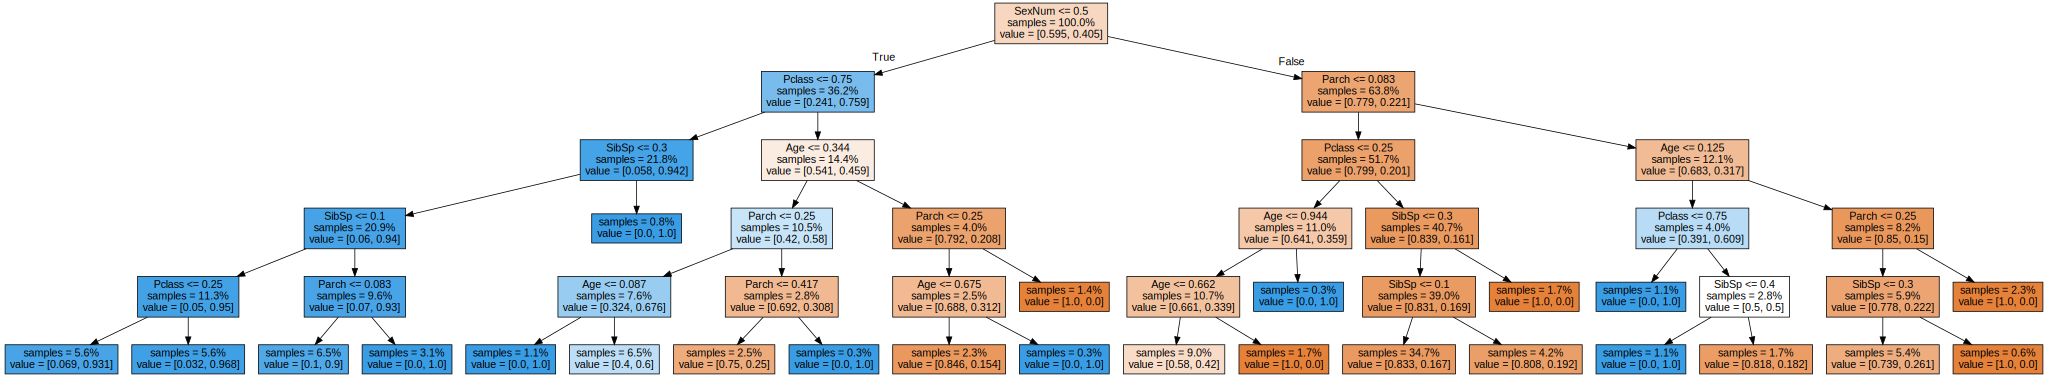

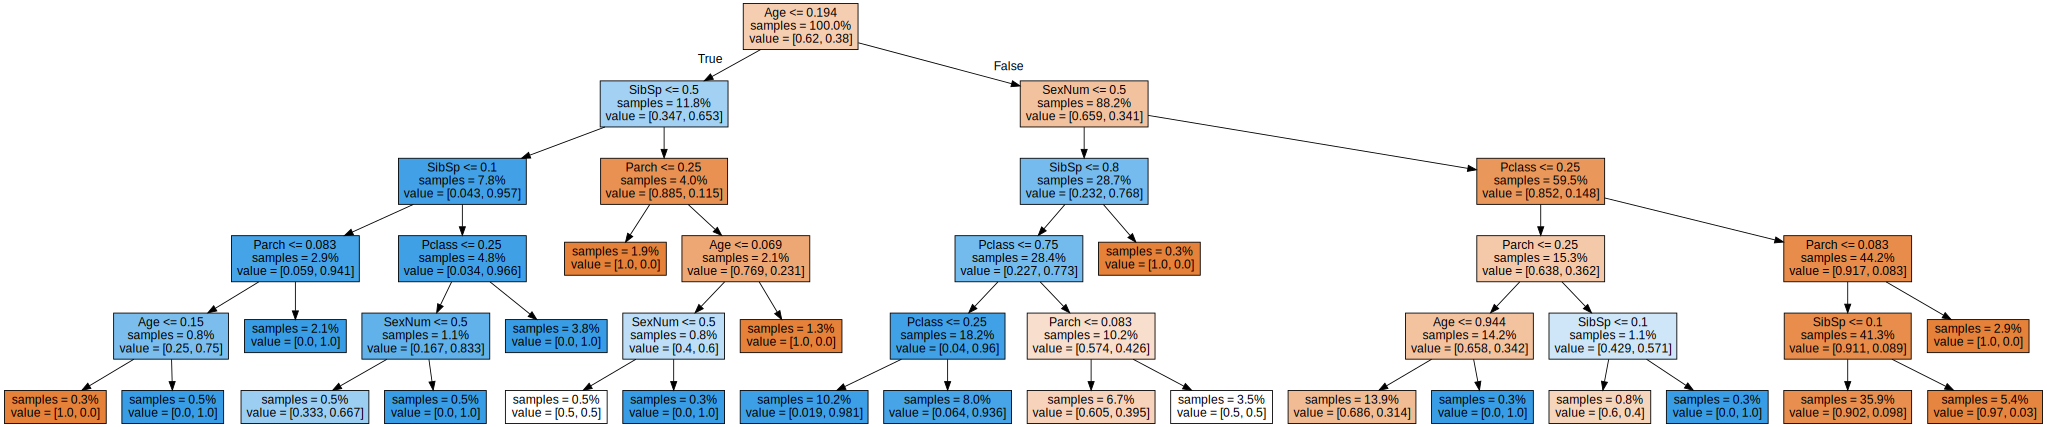

In [7]:
for i in range(3):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=6, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [8]:
y_pred = model.predict(X_test)
print ("F1 score: ", f1_score(Y_test, y_pred))



F1 score:  0.78
